In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
%run utils.py
%run bugs.py

# 7a

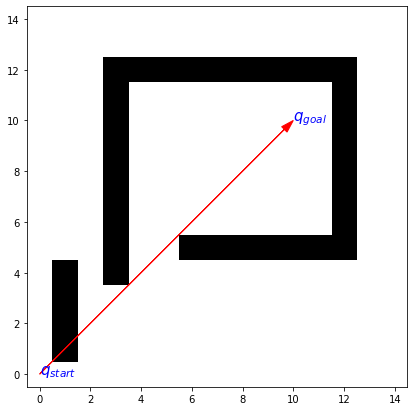

In [2]:
WO1 = [(1,1),(2,1),(2,5),(1,5)]
WO2 = [(3,4),(4,4),(4,12),(3,12)]
WO3 = [(3,12),(12,12),(12,13),(3,13)]
WO4 = [(12,5),(13,5),(13,13,),(12,13)]
WO5 = [(6,5),(12,5),(12,6),(6,6)]
qstart = (0,0)
qgoal = (10,10)

obstacles = [WO1, WO2, WO3, WO4, WO5]

W = np.zeros((15,15))

for obs in obstacles:
    xs = sorted(list(set([coord[0] for coord in obs])))
    ys = sorted(list(set([coord[1] for coord in obs])))
    
    assert (len(xs),len(ys)) == (2,2)
    
    W[xs[0]:xs[1],ys[0]:ys[1]] = 1

qstart = np.array(qstart)
qgoal = np.array(qgoal)

fig = plt.figure(figsize=(12,7))
plt.imshow(W.T,cmap='gray_r', origin='lower')
plt.arrow(*qstart,*qgoal-qstart, shape='full', ls = '-', color='r', capstyle='projecting', head_length=0.5, head_width=0.3, length_includes_head=True)
plt.text(*qstart, r"$q_{start}$", fontsize=15, c='blue')
plt.text(*qgoal, r"$q_{goal}$", fontsize=15, c='blue')
plt.show()

INFO:root:Goal Reached


(<Figure size 864x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12172eb90>)

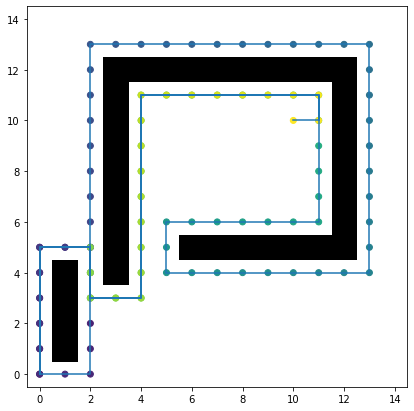

In [3]:
bug1_path = BUG1(qstart, qgoal, W)
plot_path(bug1_path,W)

INFO:root:Goal Reached


(<Figure size 864x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x121e85510>)

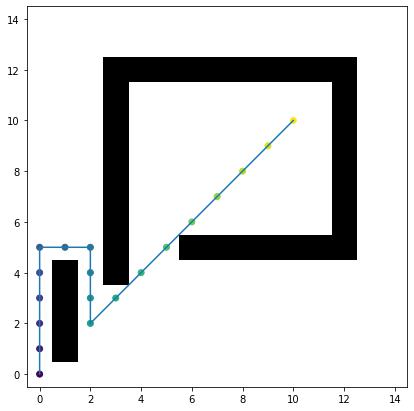

In [4]:
bug2_path = BUG2(qstart, qgoal, W)
plot_path(bug2_path, W)

# 7b) Workspace 2

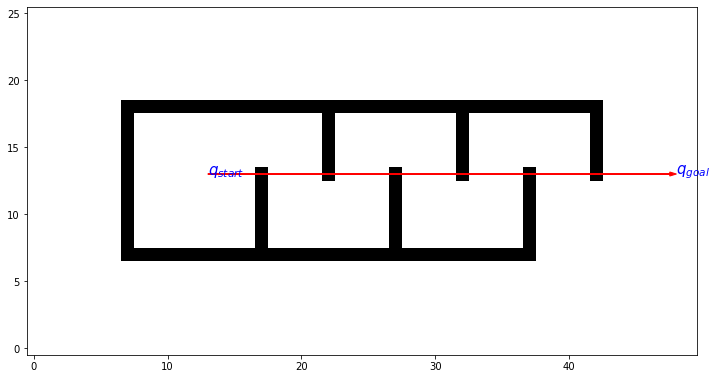

In [5]:
WO1 = [(-6,-6), (25,-6), (25,-5), (-6,-5)]
WO2 = [(-6,5),(30,5),(30,6),(-6,6)]
WO3 = [(-6,-5),(-5,-5),(-5,5),(-6,5)]
WO4 = [(4,-5),(5,-5),(5,1),(4,1)]
WO5 = [(9,0),(10,0),(10,5),(9,5)]
WO6 = [(14,-5),(15,-5),(15,1),(14,1)]
WO7 = [(19,0),(20,0),(20,5),(19,5)]
WO8 = [(24,-5),(25,-5),(25,1),(24,1)]
WO9 = [(29,0),(30,0),(30,5),(29,5)]

obstacles = [WO1, WO2, WO3, WO4, WO5, WO6, WO7, WO8, WO9]

qstart = (0,0)
qgoal = (35,0)

xmin = float('inf')
xmax = float('-inf')
ymin = float('inf')
ymax = float('-inf')

for obs in obstacles:
    xs = sorted(list(set([coord[0] for coord in obs])))
    ys = sorted(list(set([coord[1] for coord in obs])))
    if xs[0] < xmin: xmin = xs[0]
    if xs[1] > xmax: xmax = xs[1]
    if ys[0] < ymin: ymin = ys[0]
    if ys[1] > ymax: ymax = ys[1]


xrange, yrange = (xmax-xmin, ymax-ymin)
pad = 7

# Transform indices to only be positive with some padding
def transform(x,y):
    '''Real Position -> Translated Matrix Indices'''
    return (x+(pad-xmin),y+(pad-ymin))

def itransform(x,y):
    '''Translated Matrix Indices -> Real Position'''
    return (x-(pad-xmin),y-(pad-ymin))


qstart = np.array(transform(*qstart))
qgoal = np.array(transform(*qgoal))

W = np.zeros((xrange+2*pad,yrange+2*pad))

for obs in obstacles.copy():
    for i,(x,y) in enumerate(obs):
        obs[i] = transform(x,y)
        
    xs = sorted(list(set([coord[0] for coord in obs])))
    ys = sorted(list(set([coord[1] for coord in obs])))
    
    assert (len(xs),len(ys)) == (2,2)
    
    W[xs[0]:xs[1],ys[0]:ys[1]] = 1

fig, ax = plt.subplots(figsize=(12,7))
ax.imshow(W.T,cmap='gray_r', origin='lower')
# plt.plot(list(zip(qstart,qgoal))[0],list(zip(qstart,qgoal))[1], 'r--')
ax.arrow(*qstart,*qgoal-qstart, shape='full', ls = '-', color='r', capstyle='projecting', head_length=0.5, head_width=0.3, length_includes_head=True)
ax.text(*qstart, r"$q_{start}$", fontsize=15, c='blue')
ax.text(*qgoal, r"$q_{goal}$", fontsize=15, c='blue')
plt.show()

INFO:root:Goal Reached


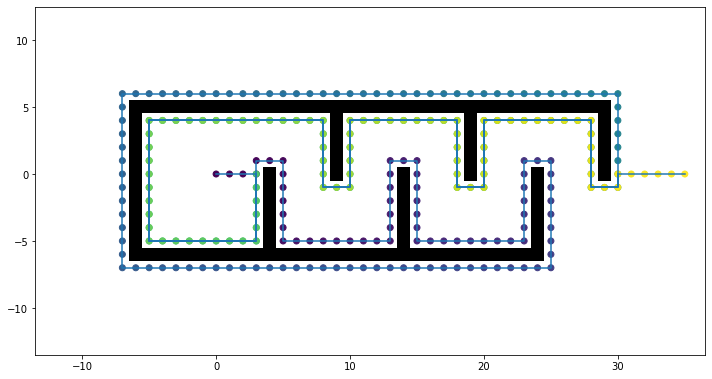

In [6]:
bug1_path = BUG1(qstart, qgoal, W)
plot_path(bug1_path, W, extents=[xmin,xmax,ymin,ymax], pad=pad)
ax.set_title("Bug 1 Path")
plt.show()

INFO:root:Goal Reached


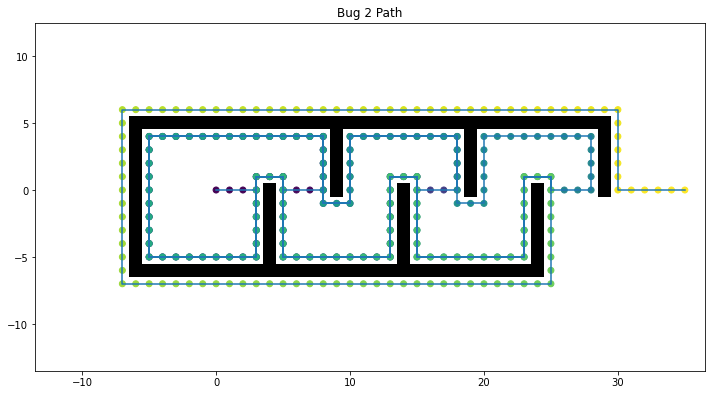

In [7]:
bug2_path = BUG2(qstart, qgoal, W)
fig, ax = plot_path(bug2_path, W, extents=[xmin,xmax,ymin,ymax], pad=pad)
ax.set_title("Bug 2 Path")
plt.show()